<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/regularization/Mini_batch_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
print(iris.species.value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [3]:
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

In [5]:
def create_model():
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
  )
  loss_fun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.001)

  return ANNiris, loss_fun, optimizer

In [7]:
num_epochs = 500
def train_model():

  train_acc = []
  test_acc = []
  losses = []

  for epochi in range(num_epochs):
    ANNiris.train()
    batch_acc = []
    batch_loss = []
    for X,y in train_loader:
      yHat = ANNiris(X)
      loss = loss_fun(yHat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batch_acc.append(100 * torch.mean((torch.argmax(yHat, axis = 1) == y).float()).item())
      batch_loss.append(loss.item())

    train_acc.append(np.mean(batch_acc))
    losses.append(np.mean(batch_loss))

    ANNiris.eval()
    X,y = next(iter(test_loader))
    predlabels = torch.argmax(ANNiris(X), axis=1)
    test_acc.append(100 * torch.mean((predlabels == y).float()).item())

  return train_acc, test_acc, losses

In [10]:
batch_sizes = 2**np.arange(1,7)

accuracy_train_results = np.zeros((num_epochs, len(batch_sizes)))
accuracy_test_results = np.zeros((num_epochs, len(batch_sizes)))

for i in range(len(batch_sizes)):
  train_loader = DataLoader(train_dataset, batch_size=int(batch_sizes[i]), shuffle=True, drop_last=True)
  test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))
  ANNiris, loss_fun, optimizer = create_model()
  train_acc, test_acc, losses = train_model()

  accuracy_train_results[:,i] = train_acc
  accuracy_test_results[:,i] = test_acc

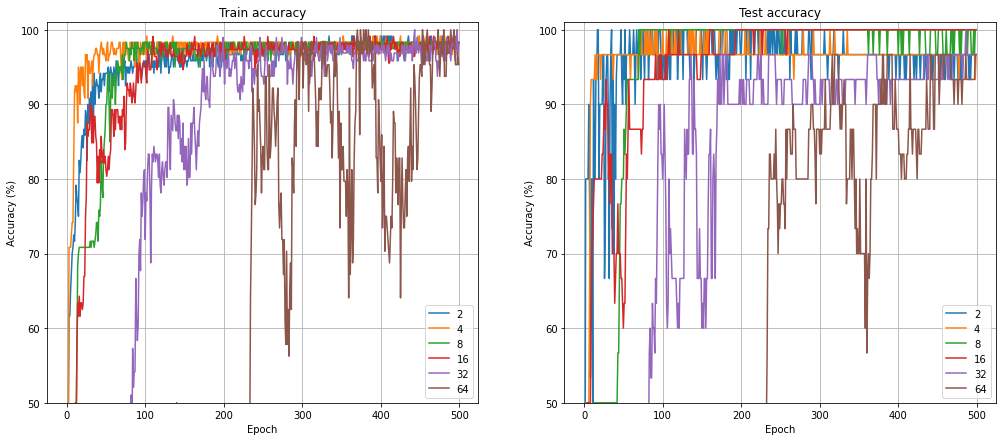

In [11]:
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accuracy_train_results)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracy_test_results)
ax[1].set_title('Test accuracy')

# common features
for i in range(2):
  ax[i].legend(batch_sizes)
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Accuracy (%)')
  ax[i].set_ylim([50,101])
  ax[i].grid()

plt.show()